## Урок 6. Взаимосвязь величин. Параметрические и непараметрические показатели корреляции. Корреляционный анализ.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

In [2]:
def get_t(alpha, n):
    return st.t.ppf(1 - (alpha / 2), n - 1)

### 1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
### zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
### ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
### Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy. Полученные значения должны быть равны. Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков, а затем с использованием функций из библиотек numpy и pandas.


#### Исходные данные

In [3]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

#### Элементарные действия

In [4]:
my_cov = np.mean(zp * ks) - np.mean(zp) * np.mean(ks)
my_r = my_cov / np.std(zp) / np.std(ks)
print(f'{my_cov:.2f}, {my_r:.4f}')

9157.84, 0.8875


#### Numpy

In [5]:
cov = np.cov(zp, ks, ddof=0)
r = np.corrcoef(zp, ks)
print(f'{cov[0][1]:.2f}, {r[0][1]:.4f}')

9157.84, 0.8875


#### Pandas

Ковариация


<AxesSubplot:>

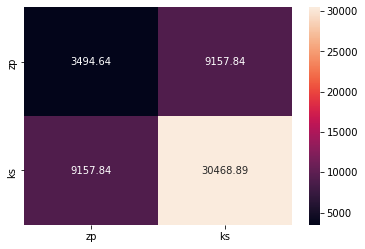

In [6]:
df = pd.DataFrame(list(zip(zp, ks)), columns =['zp', 'ks'])
print('Ковариация')
sns.heatmap(df.cov(ddof=0), annot=True, fmt=".2f")

Корреляция


<AxesSubplot:>

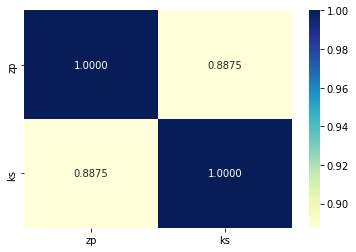

In [7]:
print('Корреляция')
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".4f")

### 2. Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:
### 131, 125, 115, 122, 131, 115, 107, 99, 125, 111.
### Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [8]:
intell_quot = [131, 125, 115, 122, 131, 115, 107, 99, 125, 111]
n = len(intell_quot)
rel = 0.95
a = 1 - rel
t = get_t(a, n)
t

2.2621571627409915

In [9]:
X = np.mean(intell_quot)
s = np.std(intell_quot, ddof = 1)

T_L = X - t * (s / n ** 0.5)
T_R = X + t * (s / n ** 0.5)

print(f'[{T_L:.4f}, {T_R:.4f}]')

[110.5561, 125.6439]


### 3. Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [10]:
M = 174.2
rel = 0.95
a = 1 - rel
n = 27
D = 25
s = np.sqrt(D)
z = st.norm.ppf((1 - rel) / 2)
z

-1.959963984540054

In [11]:
T_L = M + z * (s / n ** 0.5)
T_R = M - z * (s / n ** 0.5)

print(f'[{T_L:.4f}, {T_R:.4f}]')

[172.3140, 176.0860]
